# **EDA and Cohort analysis**

### In the following notebook, the analysis of a set of data related to sales in a year is carried out with python libraries for data analysis such as pandas and plotly for data visualization. 
### The tasks are concentrated in two stages:
* ### The first where exploratory data analysis and data cleaning is performed, and relevant information is generated for data analysis. 
* ### The second contemplates a cohort analysis where customer retention is analyzed in a certain period, which is very important for companies and their marketing strategies.

## 1. Exploratory data analyst (EDA)

### 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from operator import attrgetter

### 1.2 Exploring and wrangling data

In [2]:
#read csv file
df = pd.read_csv('C:/Users/Fernando/Documents/Repositories/cohort_analyst/invoice_sales.csv', sep=',')
df

,invoice,date,id_Client,country,units,amount
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,7"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,1488


In [3]:
# Dimension of dataframe
df.shape

(25953, 6)

In [4]:
# Data count for each columns
df.count()

invoice      25953
date         25953
id_Client    22229
country      25953
units        25953
amount       25953
dtype: int64

#### Exploring the data types we find that most of the data is of type object.This will make it difficult for us to group data analysis, so the data type must be changed in the following stages.

In [5]:
# Data types
df.dtypes

invoice       object
date          object
id_Client    float64
country       object
units          int64
amount        object
dtype: object

In [6]:
#Null values
df.isnull().sum()

invoice         0
date            0
id_Client    3724
country         0
units           0
amount          0
dtype: int64

In [7]:
#Drop null values from the dataframe
df.dropna(inplace=True)

#### In the dataframe there are negative data associated with units and amounts. These negative data are also associated with alphanumeric invoices, so it can be understood that these data correspond to returns or rejected transactions. These data make analysis difficult, so they are removed from the current dataframe.

In [8]:
df

,invoice,date,id_Client,country,units,amount
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
...,...,...,...,...,...,...
25947,C553519,5/17/2021 14:16:00,18218.0,United Kingdom,-2,"-9,9"
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,7"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"


In [9]:
# Create index from 'units' columns with values < 0
index = df[df['units'] < 0 ].index

In [10]:
# drop the index with negative values 
df.drop(index , inplace=True)
df

,invoice,date,id_Client,country,units,amount
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,"199,98"
...,...,...,...,...,...,...
25945,579252,11/28/2021 16:47:00,17450.0,United Kingdom,432,"1034,4"
25946,574908,11/7/2021 15:37:00,16009.0,United Kingdom,28,"82,76"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"


In [11]:
# Rename the clean dataframe to continue analisis
sales = df
sales

,invoice,date,id_Client,country,units,amount
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,"199,98"
...,...,...,...,...,...,...
25945,579252,11/28/2021 16:47:00,17450.0,United Kingdom,432,"1034,4"
25946,574908,11/7/2021 15:37:00,16009.0,United Kingdom,28,"82,76"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"


In [12]:
# Format date time and create new time serie for visualizations
sales['date'] = pd.to_datetime(sales['date']).dt.date
sales['date'] = pd.to_datetime(sales.date, format='%Y-%m-%d %H:%M:%S')
sales['order_month'] = sales['date'].dt.to_period('M')
sales['order_month'] = sales['order_month'].dt.to_timestamp('s').dt.strftime('%Y-%m')

## 1.3 Invoices by month

#### Grouping the invoice data by month, it can be seen in the line graph that there is a large number of invoices in the month of November. This may correspond to the seasonality of purchases for the Christmas party, since afterwards a pronounced decrease in the number of invoices is observed.

In [13]:
invoice= sales.groupby('order_month', as_index=False, sort=True).agg({"invoice": "count"})
fig = px.line(data_frame=invoice, x='order_month', y='invoice', markers=True, title='invoices by month', width=800, height=500)

fig.show()

## 1.4 Unique clients by month

#### Grouping the unique customers per month chart, a trend similar to the invoices/month graph is observed. It can be determined that there was a large number of customers making purchases in a given month by increasing the volume of invoices

In [14]:
number_client = sales.groupby('order_month', as_index=False).agg({"id_Client": lambda x:x .nunique()})
fig = px.line(data_frame=number_client, x='order_month', y='id_Client', markers=True, title='unique_clients_by_month', width=800, height=500)
fig.show()

## 1.4 Top countries by invoice 

#### Grouping the invoice number data by country, it is observed that the countries that generate the most invoices are the UK, Germany, France and Eire, with the UK being the one that generates the largest number of invoices.

In [15]:
# Change the data type and grouping invoices by country
sales["invoice"] = [float(str(i).replace(",", "")) for i in sales["invoice"]]
percentage= sales.groupby('country', as_index=False, sort=False).agg({"invoice": "count"})
top_invoice=percentage.head(4)
top_invoice
fig = px.bar(top_invoice, x="country", y="invoice", title='Top countries by invoice', width=800, height=500)
fig.show()

## 1.5 Percentage of invoices by countries

#### Observing the same data and converting it to a percentage, it can be seen that the UK has 89% of the total invoices generated in 2021

In [16]:
# percentage of total invoices by country
percentage['%'] = (percentage['invoice'] / percentage['invoice'].sum()) * 100
perc=percentage.head(4)
fig = px.pie(perc, values='invoice', names='country',
             title='Percentage of invoices by country', width=800, height=500, hole=.4)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [17]:
# Change the data type  for column amount
sales["amount"] = [float(str(i).replace(",", "")) for i in sales["amount"]]

## 1.6 Total amount by countries

#### As expected, when graphing the total amounts accumulated during 2021, the same trend as in the previous graphs is observed, showing that the UK generated the highest amount during the 2021 period.

In [18]:
# Group total amount by countries
total_amount=sales.groupby('country', as_index=False, sort=False).agg({'amount': 'sum'})
top_amount=total_amount.head(4)
fig = px.bar(top_amount, x="country", y="amount", title='Top countries by amount', width=800, height=500)
fig.show()


# 2. Cohort analyst 

### Now we can analyze how many customers remain in business during the period, which can indicate the impact of the business strategies implemented on customers to keep them over time.

### 2.1 Insights

#### Analyzing the data, it is observed that there are no negative values ​​in the units column, and the data count of the invoices column and the id_client column are also observed, so there are no null values. Finally, it was observed that the maximum number of invoices is greater than the number of clients because it already gives us an idea of retention data.

In [19]:
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
invoice,18570.0,559516.518848,13040.460425,536365.0,548335.25,559809.5,570826.75,581587.0
id_Client,18570.0,15265.970813,1734.016581,12346.0,13772.50,15173.0,16779.00,18287.0
units,18570.0,279.071459,975.795133,1.0,74.00,155.0,290.75,80995.0
amount,18570.0,35048.709424,84494.396329,0.0,3451.50,19505.0,38557.75,3169816.0


#### Grouping the data by client id and invoice numbers and later we filter by the clients that have generated more than one invoice,
#### it is obtained that 67% of the clients ordered more than once.

In [20]:
#Groupby numbers of invoices/ client_id and filter by id_client with more than one order 
n_orders = df.groupby(['id_Client'])['invoice'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / sales['id_Client'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

65.57% of customers ordered more than once.


### 2.2 Histogram

#### The histogram shows that the majority of customers 3900 aprox. presents an invoice frequency of 0-9, then decreases to clients with invoice frequencies of 10 -19, and only some exceptions, clients have 50 to 200 invoices.

In [21]:
fig = px.histogram(n_orders, x="invoice", nbins=40, width=800, height=500, title= 'invoice per customer')
fig.show()

### 2.3 Cohort variables

#### The next step is to create the variables for the cohort analysis. To do this, two columns are generated, one for each month of the year and the other the date on which the customer made the first purchase. 

In [22]:
df['order_m'] = df['date'].dt.to_period('M')

In [23]:
df['cohort'] = df.groupby('id_Client')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 

### 2.4 Cohort and pivot table

Then they are grouped, a new dataframe is generated with the number of clients generated per month.
After this step, a pivot table is generated to relate the cohort to a given period.

In [24]:
df_cohort = df.groupby(['cohort', 'order_m']) \
              .agg(n_customers=('id_Client', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_m - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_m,n_customers,period_number
0,2020-12,2020-12,885,0
1,2020-12,2021-01,324,1
2,2020-12,2021-02,286,2
3,2020-12,2021-03,340,3
4,2020-12,2021-04,321,4
...,...,...,...,...
86,2021-10,2021-11,86,1
87,2021-10,2021-12,41,2
88,2021-11,2021-11,324,0
89,2021-11,2021-12,36,1


In [25]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2020-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2021-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2021-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2021-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2021-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2021-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2021-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.5 Retention matrix

Obtaining the pivot table, the retention matrix can be generated by dividing each row by the cohort size, which corresponds to the first column that contains the total number of customers for their first purchase.

In [26]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix


period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2020-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2021-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2021-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2021-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2021-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2021-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2021-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.6 Retention matrix analysis

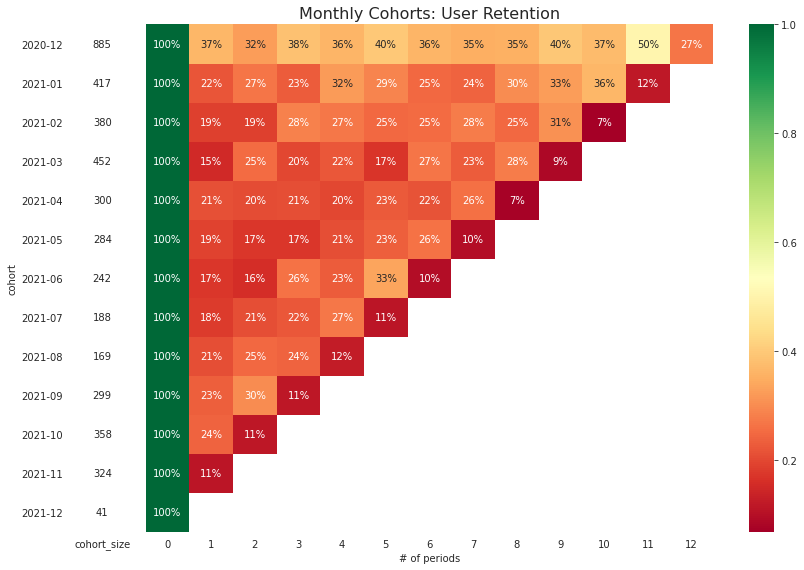

In [27]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
# retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

* The retention table tells us that the 2020-12 cohort has higher user retention than subsequent cohorts. 
* It is observed that in cohort 2220-12 in period 11 there is an increase of 50% retention that may be associated with some strategy, promotion or be associated with Christmas purchases seen in previous visualizations.
* In the cohorts after 2020-12, a drop in retention of approximately 80% is observed. and is maintained during the following periods.